In [880]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import keras
import tensorflow as tf
from keras import layers

In [881]:
data = pd.read_csv("Churn Modeling.csv")

In [882]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [883]:
data.corr()

<ipython-input-883-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [884]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [885]:
mask_not_churn = data.loc[:, "Exited"] == 0
data[mask_not_churn]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0


In [886]:
len(data[mask_not_churn])

7963

In [887]:
mask_churn = data.loc[:, "Exited"] == 1
data[mask_churn]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [888]:
len(data[mask_not_churn])

7963

In [889]:
data.loc[:, "SBratio"] = (data.loc[:, "EstimatedSalary"]) / (data.loc[:, "Balance"])

In [890]:
for i in range(0, len(data.loc[:, "SBratio"])):
  #print(data.loc[i, "Liquidity"])
  if data.loc[i, "SBratio"] == float('inf'):
    data.loc[i, "SBratio"] = 0

In [891]:
# Generations

#2023 - 92

"""
Silent Generation  = 1928 - 1945 0
Baby Boomers = 1946 - 1964 1
Generation X = 1965 - 1980 2
Millenials = 1981 - 1996 3
Generation Z = 1997 - 2012 4
Generation Alpha = 2013 - present
"""

current_year = 2023

silent_upper_bound = current_year - 1928
silent_lower_bound = current_year - 1945
boomer_upper_bound = current_year - 1946
boomer_lower_bound = current_year - 1964
genx_upper_bound = current_year - 1965
genx_lower_bound = current_year - 1980
millenial_upper_bound = current_year - 1981
millenial_lower_bound = current_year - 1996
genz_upper_bound = current_year - 1997
genz_lower_bound = current_year - 2012

In [892]:
print(millenial_upper_bound , millenial_lower_bound)

42 27


In [893]:
data.loc[:, "Generation"] = (data.loc[:, "Age"]) >= 78

In [894]:
def generations(row):
  generation_index = 0
  if row >= 78:
    generation_index = 0
  elif row >= 59 and row < 78:
    generation_index = 1
  elif row >= 43 and row < 59:
    generation_index = 2
  elif row >= 27 and row <= 42:
    generation_index = 3
  elif row < 27:
    generation_index = 4
  return generation_index

In [895]:
data.loc[:, "Generation"] = data.loc[:, "Age"].apply(generations)

In [896]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,SBratio,Generation
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,3
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1.342864,3
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0.713585,3
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,3
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0.630098,2


In [897]:
silent_generation_not_churned = (data.loc[:, "Exited"] == 0) & (data.loc[:, "Generation"] == 0)

In [898]:
len(data.loc[:, "Generation"][silent_generation_not_churned])

23

In [899]:
silent_generation_churned = (data.loc[:, "Exited"] == 1) & (data.loc[:, "Generation"] == 0)

In [900]:
len(data.loc[:, "Generation"][silent_generation_churned])

1

In [901]:
len(data[data.loc[:, "Age"] >= 78])

24

In [902]:
boomer_generation_not_churned = (data.loc[:, "Exited"] == 0) & (data.loc[:, "Generation"] == 1)
len(data.loc[:, "Generation"][boomer_generation_not_churned])

388

In [903]:
boomer_generation_churned = (data.loc[:, "Exited"] == 1) & (data.loc[:, "Generation"] == 1)
len(data.loc[:, "Generation"][boomer_generation_churned])

176

In [904]:
genx_not_churned = (data.loc[:, "Exited"] == 0) & (data.loc[:, "Generation"] == 2)
len(data.loc[:, "Generation"][genx_not_churned])

1278

In [905]:
genx_churned = (data.loc[:, "Exited"] == 1) & (data.loc[:, "Generation"] == 2)
len(data.loc[:, "Generation"][genx_churned])

1028

In [906]:
millenials_not_churned = (data.loc[:, "Exited"] == 0) & (data.loc[:, "Generation"] == 3)
len(data.loc[:, "Generation"][millenials_not_churned])

5523

In [907]:
millenials_churned = (data.loc[:, "Exited"] == 1) & (data.loc[:, "Generation"] == 3)
len(data.loc[:, "Generation"][millenials_churned])

772

In [908]:
genz_not_churned = (data.loc[:, "Exited"] == 0) & (data.loc[:, "Generation"] == 4)
len(data.loc[:, "Generation"][genz_not_churned])

751

In [909]:
genz_churned = (data.loc[:, "Exited"] == 1) & (data.loc[:, "Generation"] == 4)
len(data.loc[:, "Generation"][genz_churned])

60

In [910]:
def sbratio_probability_not_churn(row):
  probs_not_churn = 0
  if row >= 0.59 and row < 1.025:
    probs_not_churn = 0.31
  elif row >= 1.025:
    probs_not_churn = 0.18
  elif row == 0:
    probs_not_churn = 0.31
  elif row > 0 and row < 0.59:
    probs_not_churn = 0.2
  return probs_not_churn

def sbratio_probability_churn(row):
  probs_churn = 0
  if row >= 0.59 and row < 1.025:
    probs_churn = 0.09
  elif row >= 1.025:
    probs_churn = 0.06
  elif row == 0:
    probs_churn = 0.05
  elif row > 0 and row < 0.59:
    probs_churn = 0.8
  return probs_churn

In [911]:
data.loc[:, "SBProbNotChurn"] = data.loc[:, "SBratio"].apply(sbratio_probability_not_churn)

In [912]:
data.loc[:, "SBProbChurn"] = data.loc[:, "SBratio"].apply(sbratio_probability_churn)

In [913]:
print(data.loc[:, "SBratio"])

0       0.000000
1       1.342864
2       0.713585
3       0.000000
4       0.630098
          ...   
9995    0.000000
9996    1.772712
9997    0.000000
9998    1.237271
9999    0.293453
Name: SBratio, Length: 10000, dtype: float64


In [914]:
def generation_not_churn_probabilities(row):
  likelihood = 0
  if row == 0:
    likelihood = 0.96
  elif row == 1:
    likelihood = 0.69
  elif row == 2:
    likelihood = 0.55
  elif row == 3:
    likelihood = 0.87
  elif row == 4:
    likelihood = 0.93
  return likelihood

def generation_churn_probabilities(row):
  likelihood_2 = 0
  if row == 0:
    likelihood_2 = 0.04
  elif row == 1:
    likelihood_2 = 0.31
  elif row == 2:
    likelihood_2 = 0.45
  elif row == 3:
    likelihood_2 = 0.12
  elif row == 4:
    likelihood_2 = 0.07
  return likelihood_2

In [915]:
data.loc[:, "GenProbNotChurn"] = data.loc[:, "Generation"].apply(generation_not_churn_probabilities)

In [916]:
data.loc[:, "GenProbChurn"] = data.loc[:, "Generation"].apply(generation_churn_probabilities)

In [917]:
def credit_worthiness(row):
  credit_worthy = None
  if row <= 720:
    credit_worthy = 0
  elif row >= 721 and row < 800:
    credit_worthy = 1
  elif row >= 800:
    credit_worthy = 2
  return credit_worthy

In [918]:
data.loc[:, "CreditWorthiness"] = data.loc[:, "CreditScore"].apply(credit_worthiness)

In [919]:
low_credit_worthiness_not_churned = (data.loc[:, "Exited"] == 0) & (data.loc[:, "CreditWorthiness"] == 0)

In [920]:
low_credit_worthiness_churned = (data.loc[:, "Exited"] == 1) & (data.loc[:, "CreditWorthiness"] == 0)

In [921]:
len(data[low_credit_worthiness_churned])

1551

In [922]:
len(data[low_credit_worthiness_not_churned])

6041

In [923]:
low_credit_not_churned_probs = len(data[low_credit_worthiness_not_churned]) / (len(data[low_credit_worthiness_churned]) + len(data[low_credit_worthiness_not_churned]))

In [924]:
print(low_credit_not_churned_probs)

0.7957060063224447


In [925]:
low_credit_churned_probs = len(data[low_credit_worthiness_churned]) / (len(data[low_credit_worthiness_churned]) + len(data[low_credit_worthiness_not_churned]))

In [926]:
fair_credit_worthiness_not_churned = (data.loc[:, "Exited"] == 0) & (data.loc[:, "CreditWorthiness"] == 1)

In [927]:
fair_credit_worthiness_churned = (data.loc[:, "Exited"] == 1) & (data.loc[:, "CreditWorthiness"] == 1)

In [928]:
len(data[fair_credit_worthiness_not_churned])

1395

In [929]:
len(data[fair_credit_worthiness_churned])

358

In [930]:
fair_credit_worthiness_not_churned_probs = len(data[fair_credit_worthiness_not_churned]) / (len(data[fair_credit_worthiness_not_churned]) + len(data[fair_credit_worthiness_churned]))

In [931]:
fair_credit_worthiness_churned_probs = len(data[fair_credit_worthiness_churned]) / (len(data[fair_credit_worthiness_not_churned]) + len(data[fair_credit_worthiness_churned]))

In [932]:
print(fair_credit_worthiness_not_churned_probs)

0.7957786651454649


In [933]:
good_credit_worthiness_not_churned = (data.loc[:, "Exited"] == 0) & (data.loc[:, "CreditWorthiness"] == 2)

In [934]:
good_credit_worthiness_churned = (data.loc[:, "Exited"] == 1) & (data.loc[:, "CreditWorthiness"] == 2)

In [935]:
good_credit_worthiness_not_churned_probs = len(data[good_credit_worthiness_not_churned]) / (len(data[good_credit_worthiness_not_churned]) + len(data[good_credit_worthiness_churned]))

In [936]:
good_credit_worthiness = data.loc[:, "CreditWorthiness"] == 2

In [937]:
def credit_worthy_not_churned_probability(row):
  probs = 0
  if row == 0:
    probs =0.795
  elif row == 1:
    probs == 0.795
  elif row == 2:
    probs = 0.8
  return probs

def credit_worthy_churned_probability(row):
  probs = 0
  if row == 0:
    probs =0.205
  elif row == 1:
    probs == 0.205
  elif row == 2:
    probs = 0.2
  return probs

In [938]:
data.loc[:, "CreditNotChurnedProbs"] = data.loc[:, "CreditWorthiness"].apply(credit_worthy_not_churned_probability)

In [939]:
data.loc[:, "CreditChurnedProbs"] = data.loc[:, "CreditWorthiness"].apply(credit_worthy_churned_probability)

In [940]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,Exited,SBratio,Generation,SBProbNotChurn,SBProbChurn,GenProbNotChurn,GenProbChurn,CreditWorthiness,CreditNotChurnedProbs,CreditChurnedProbs
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,...,0,0.000000,3,0.31,0.05,0.87,0.12,1,0.000,0.000
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,...,0,1.772712,3,0.18,0.06,0.87,0.12,0,0.795,0.205
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,...,1,0.000000,3,0.31,0.05,0.87,0.12,0,0.795,0.205
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,...,1,1.237271,3,0.18,0.06,0.87,0.12,1,0.000,0.000
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,...,0,0.293453,3,0.20,0.80,0.87,0.12,1,0.000,0.000


In [941]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,Exited,SBratio,Generation,SBProbNotChurn,SBProbChurn,GenProbNotChurn,GenProbChurn,CreditWorthiness,CreditNotChurnedProbs,CreditChurnedProbs
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,...,1,0.000000,3,0.31,0.05,0.87,0.12,0,0.795,0.205
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,...,0,1.342864,3,0.18,0.06,0.87,0.12,0,0.795,0.205
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,...,1,0.713585,3,0.31,0.09,0.87,0.12,0,0.795,0.205
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,...,0,0.000000,3,0.31,0.05,0.87,0.12,0,0.795,0.205
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,...,0,0.630098,2,0.31,0.09,0.55,0.45,2,0.800,0.200


In [942]:
data[0:200]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,Exited,SBratio,Generation,SBProbNotChurn,SBProbChurn,GenProbNotChurn,GenProbChurn,CreditWorthiness,CreditNotChurnedProbs,CreditChurnedProbs
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,...,1,0.000000,3,0.31,0.05,0.87,0.12,0,0.795,0.205
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,...,0,1.342864,3,0.18,0.06,0.87,0.12,0,0.795,0.205
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,...,1,0.713585,3,0.31,0.09,0.87,0.12,0,0.795,0.205
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,...,0,0.000000,3,0.31,0.05,0.87,0.12,0,0.795,0.205
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,...,0,0.630098,2,0.31,0.09,0.55,0.45,2,0.800,0.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,15594815,Aleshire,807,France,Male,35,3,174790.15,1,...,0,0.003435,3,0.20,0.80,0.87,0.12,2,0.800,0.200
196,197,15635905,Moran,616,Spain,Female,32,6,0.00,2,...,0,0.000000,3,0.31,0.05,0.87,0.12,0,0.795,0.205
197,198,15777892,Samsonova,721,Germany,Male,37,3,107720.64,1,...,0,1.472245,3,0.18,0.06,0.87,0.12,1,0.000,0.000
198,199,15656176,Jenkins,501,France,Male,57,10,0.00,2,...,0,0.000000,2,0.31,0.05,0.55,0.45,0,0.795,0.205


In [943]:
print(data.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'SBratio', 'Generation',
       'SBProbNotChurn', 'SBProbChurn', 'GenProbNotChurn', 'GenProbChurn',
       'CreditWorthiness', 'CreditNotChurnedProbs', 'CreditChurnedProbs'],
      dtype='object')


In [944]:
def weight_double(row):
  factor = row
  return factor * factor

In [945]:
data.loc[:, "GenProbNotChurn"].apply(weight_double)

data.loc[:, "GenProbChurn"].apply(weight_double)

data.loc[:, "SBProbChurn"].apply(weight_double)

data.loc[:, "SBProbNotChurn"].apply(weight_double)

data.loc[:, "CreditNotChurnedProbs"].apply(weight_double)

data.loc[:, "CreditChurnedProbs"].apply(weight_double)

0       0.042025
1       0.042025
2       0.042025
3       0.042025
4       0.040000
          ...   
9995    0.000000
9996    0.042025
9997    0.042025
9998    0.000000
9999    0.000000
Name: CreditChurnedProbs, Length: 10000, dtype: float64

In [946]:
data = data[['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Generation', 'SBratio', 'CreditWorthiness', 'SBProbNotChurn', 'SBProbChurn', 'GenProbNotChurn', 'GenProbChurn', 'CreditNotChurnedProbs', 'CreditChurnedProbs', 'Exited']]

In [947]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Generation', 'SBratio',
       'CreditWorthiness', 'SBProbNotChurn', 'SBProbChurn', 'GenProbNotChurn',
       'GenProbChurn', 'CreditNotChurnedProbs', 'CreditChurnedProbs',
       'Exited'],
      dtype='object')

In [948]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Generation,SBratio,CreditWorthiness,SBProbNotChurn,SBProbChurn,GenProbNotChurn,GenProbChurn,CreditNotChurnedProbs,CreditChurnedProbs,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,2.730500,0.585576,0.306300,0.253012,0.226004,0.791138,0.202567,0.655964,0.168736,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.697365,0.820327,0.586101,0.060594,0.307373,0.139767,0.143357,0.302446,0.077808,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.180000,0.050000,0.550000,0.040000,0.000000,0.000000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,2.000000,0.000000,0.000000,0.180000,0.050000,0.690000,0.120000,0.795000,0.205000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,3.000000,0.372599,0.000000,0.310000,0.060000,0.870000,0.120000,0.795000,0.205000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,3.000000,1.025033,0.000000,0.310000,0.090000,0.870000,0.310000,0.795000,0.205000,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,4.000000,46.983233,2.000000,0.310000,0.800000,0.960000,0.450000,0.800000,0.205000,1.000000


In [949]:
data.corr()

<ipython-input-949-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Generation,SBratio,CreditWorthiness,SBProbNotChurn,SBProbChurn,GenProbNotChurn,GenProbChurn,CreditNotChurnedProbs,CreditChurnedProbs,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.004566,-0.002252,-0.003991,0.003546,0.004028,0.006512,-0.006821,0.001606,0.001679,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.009395,0.009366,0.004828,0.007238,-0.009975,-0.003379,0.003374,0.001979,0.001839,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,0.004308,0.011160,0.742303,-0.009396,0.003784,0.013261,-0.013254,-0.497184,-0.508247,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,-0.912072,0.018029,-0.000024,-0.013816,0.010637,-0.698571,0.697747,0.002915,0.002877,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,0.011975,-0.011567,-0.000366,-0.000015,-0.011003,0.008104,-0.007897,-0.004612,-0.004543,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,-0.023566,0.380992,0.005127,-0.601713,0.467718,-0.041213,0.041347,-0.005183,-0.005237,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,0.028820,-0.162288,0.005867,0.228936,-0.154851,0.029163,-0.029325,0.005215,0.005009,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,0.007652,-0.013308,-0.009338,0.006772,-0.000177,0.015841,-0.016054,0.002698,0.002883,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.073114,-0.007437,0.011693,0.002560,0.001727,-0.011213,0.012419,-0.004708,-0.004923,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.006819,0.418101,0.004941,-0.079731,-0.573841,0.000384,-0.000176,-0.006119,-0.006156,0.012097


In [950]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,Generation,SBratio,CreditWorthiness,SBProbNotChurn,SBProbChurn,GenProbNotChurn,GenProbChurn,CreditNotChurnedProbs,CreditChurnedProbs,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,...,3,0.000000,0,0.31,0.05,0.87,0.12,0.795,0.205,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,...,3,1.342864,0,0.18,0.06,0.87,0.12,0.795,0.205,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,...,3,0.713585,0,0.31,0.09,0.87,0.12,0.795,0.205,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,...,3,0.000000,0,0.31,0.05,0.87,0.12,0.795,0.205,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,...,2,0.630098,2,0.31,0.09,0.55,0.45,0.800,0.200,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,...,3,0.000000,1,0.31,0.05,0.87,0.12,0.000,0.000,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,...,3,1.772712,0,0.18,0.06,0.87,0.12,0.795,0.205,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,...,3,0.000000,0,0.31,0.05,0.87,0.12,0.795,0.205,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,...,3,1.237271,1,0.18,0.06,0.87,0.12,0.000,0.000,1


In [951]:
X = data.iloc[:, 3:-1].values
y = data.iloc[:, -1].values

In [952]:
mask_credit_score = (data.loc[:, "CreditScore"] <= 584)

print(len(data[mask_credit_score]))

# g00d = 2550
# fair = 2544
# low = 2534

2534


In [953]:
print(len(data.columns))

23


In [954]:
#X[:, 13]

In [955]:
churned = []
unchurned = []

for i in range(0, len(y)):
  if y[i] == 0:
    unchurned.append(y[i])
  else:
    churned.append(y[i])

In [956]:
print(len(churned), len(unchurned))

2037 7963


In [957]:
credit_score = data.iloc[:, 3].values

In [958]:
print(credit_score.max())

850


In [959]:
X[:, 11]

array([0.0, 1.342864261180276, 0.7135851129394317, ..., 0.0,
       1.237271214730915, 0.29345290661126905], dtype=object)

In [960]:
from sklearn.preprocessing import OrdinalEncoder
ord_encoder = OrdinalEncoder()
X[:, 2:3] = ord_encoder.fit_transform(X[:, 2:3])

In [961]:
print(X)

[[619 'France' 0.0 ... 0.12 0.795 0.205]
 [608 'Spain' 0.0 ... 0.12 0.795 0.205]
 [502 'France' 0.0 ... 0.12 0.795 0.205]
 ...
 [709 'France' 0.0 ... 0.12 0.795 0.205]
 [772 'Germany' 1.0 ... 0.12 0.0 0.0]
 [792 'France' 0.0 ... 0.12 0.0 0.0]]


In [962]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 10])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [963]:
print(X)

[[1.0 0.0 0.0 ... 0.12 0.795 0.205]
 [0.0 0.0 1.0 ... 0.12 0.795 0.205]
 [1.0 0.0 0.0 ... 0.12 0.795 0.205]
 ...
 [1.0 0.0 0.0 ... 0.12 0.795 0.205]
 [0.0 1.0 0.0 ... 0.12 0.0 0.0]
 [1.0 0.0 0.0 ... 0.12 0.0 0.0]]


Using SMOTE to balance the class distribution

In [964]:
from imblearn.over_sampling import SMOTE
from collections import Counter

resample = SMOTE()
X, y = resample.fit_resample(X, y)
counter = Counter(y)
print(counter)

Counter({1: 7963, 0: 7963})


In [965]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1)

In [966]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,Generation,SBratio,CreditWorthiness,SBProbNotChurn,SBProbChurn,GenProbNotChurn,GenProbChurn,CreditNotChurnedProbs,CreditChurnedProbs,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,...,3,0.000000,0,0.31,0.05,0.87,0.12,0.795,0.205,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,...,3,1.342864,0,0.18,0.06,0.87,0.12,0.795,0.205,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,...,3,0.713585,0,0.31,0.09,0.87,0.12,0.795,0.205,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,...,3,0.000000,0,0.31,0.05,0.87,0.12,0.795,0.205,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,...,2,0.630098,2,0.31,0.09,0.55,0.45,0.800,0.200,0


In [967]:
#data.corr()

In [968]:
X_train[:, :]

array([[0.        , 1.        , 0.        , ..., 0.40277731, 0.7957155 ,
        0.2042845 ],
       [1.        , 0.        , 0.        , ..., 0.12      , 0.        ,
        0.        ],
       [0.        , 0.57183068, 0.42816932, ..., 0.26129588, 0.795     ,
        0.205     ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.45      , 0.50334874,
        0.12979433],
       [0.        , 1.        , 0.        , ..., 0.12      , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.45      , 0.2941125 ,
        0.07584033]])

In [969]:
X_train.shape[1]

25

In [970]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,Generation,SBratio,CreditWorthiness,SBProbNotChurn,SBProbChurn,GenProbNotChurn,GenProbChurn,CreditNotChurnedProbs,CreditChurnedProbs,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,...,3,0.000000,0,0.31,0.05,0.87,0.12,0.795,0.205,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,...,3,1.342864,0,0.18,0.06,0.87,0.12,0.795,0.205,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,...,3,0.713585,0,0.31,0.09,0.87,0.12,0.795,0.205,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,...,3,0.000000,0,0.31,0.05,0.87,0.12,0.795,0.205,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,...,2,0.630098,2,0.31,0.09,0.55,0.45,0.800,0.200,0


In [971]:
data.iloc[:, :-5]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Generation,SBratio,CreditWorthiness,SBProbNotChurn,SBProbChurn
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,3,0.000000,0,0.31,0.05
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,3,1.342864,0,0.18,0.06
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,3,0.713585,0,0.31,0.09
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,3,0.000000,0,0.31,0.05
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,2,0.630098,2,0.31,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,3,0.000000,1,0.31,0.05
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,3,1.772712,0,0.18,0.06
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,3,0.000000,0,0.31,0.05
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,3,1.237271,1,0.18,0.06


In [972]:
X_train[:, :-4]

array([[0.        , 1.        , 0.        , ..., 0.28619814, 0.2       ,
        0.8       ],
       [1.        , 0.        , 0.        , ..., 1.        , 0.2       ,
        0.8       ],
       [0.        , 0.57183068, 0.42816932, ..., 0.        , 0.18      ,
        0.06      ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.36685693, 0.18      ,
        0.06      ],
       [0.        , 1.        , 0.        , ..., 1.        , 0.2       ,
        0.8       ],
       [1.        , 0.        , 0.        , ..., 0.63004717, 0.31      ,
        0.05      ]])

In [973]:
X_train_scaled = X_train
X_test_scaled = X_test

In [974]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled[:, :-6] = scaler.fit_transform(X_train_scaled[:, :-6])
X_test_scaled[:, :-6] = scaler.transform(X_test_scaled[:, :-6])

In [975]:
X_train.shape

(10351, 25)

Support Vector Machines

In [976]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='rbf', random_state=0)
svm_classifier.fit(X_train_scaled, y_train)

SVC(random_state=0)

In [977]:
y_pred_svm = svm_classifier.predict(X_test_scaled)

In [978]:
from sklearn.metrics import confusion_matrix, accuracy_score
svm_cm = confusion_matrix(y_test, y_pred_svm)
svm_acc = accuracy_score(y_test, y_pred_svm)

In [979]:
print(svm_acc)

0.8591928251121076


  Logistic Regression

In [980]:
from sklearn.linear_model import LogisticRegressionCV
log_classifier = LogisticRegressionCV(random_state=0)
log_classifier.fit(X_train_scaled, y_train)

LogisticRegressionCV(random_state=0)

In [981]:
y_pred_log = log_classifier.predict(X_test_scaled)

In [982]:
from sklearn.metrics import confusion_matrix, accuracy_score
log_cm = confusion_matrix(y_test, y_pred_log)
log_acc = accuracy_score(y_test, y_pred_log)

In [983]:
print(log_acc)

0.7302242152466367


Random Forest

In [984]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [985]:
y_pred = rf_classifier.predict(X_test)

In [986]:
from sklearn.metrics import confusion_matrix, accuracy_score
rf_cm = confusion_matrix(y_test, y_pred)
rf_acc = accuracy_score(y_test, y_pred)

In [987]:
print(rf_cm)

[[2566  144]
 [ 377 2488]]


In [988]:
print(rf_acc)

0.9065470852017937


Decision Trees

In [989]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [990]:
y_pred_dt = dt_classifier.predict(X_test)

In [991]:
from sklearn.metrics import confusion_matrix, accuracy_score
dt_cm = confusion_matrix(y_test, y_pred_dt)
dt_acc = accuracy_score(y_test, y_pred_dt)

In [992]:
print(dt_cm)

[[2307  403]
 [ 394 2471]]


In [993]:
print(dt_acc)

0.8570403587443947


Naive Bayes Classifier.

In [994]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [995]:
y_pred_nb = nb_classifier.predict(X_test)

In [996]:
from sklearn.metrics import confusion_matrix, accuracy_score
nb_cm = confusion_matrix(y_test, y_pred_nb)
nb_acc = accuracy_score(y_test, y_pred_nb)

In [997]:
print(nb_cm)

[[1890  820]
 [ 550 2315]]


In [998]:
print(nb_acc)

0.7542600896860987


In [999]:
from sklearn.model_selection import cross_val_score
accuracies_nb = cross_val_score(estimator = nb_classifier, X = X_train, y = y_train, cv = 10)
print(f'{round(accuracies_nb.mean(), 4) * 100}%')

75.0%


Gradient Boosting.

In [1000]:
from xgboost import XGBClassifier
xg_classifier = XGBClassifier()
xg_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [1001]:
y_pred_xg = xg_classifier.predict(X_test)

In [1002]:
from sklearn.metrics import confusion_matrix, accuracy_score
xg_cm = confusion_matrix(y_test, y_pred_xg)
xg_acc = accuracy_score(y_test, y_pred_xg)

In [1003]:
print(xg_cm)

[[2547  163]
 [ 362 2503]]


In [1004]:
print(xg_acc)

0.905829596412556


In [1005]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = xg_classifier, X = X_train, y = y_train, cv = 10)
print(f'{round(accuracies.mean(), 4) * 100}%')

90.86999999999999%


Ensemble Model

AdaBoost Classifier

In [1006]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(ada_classifier, X_train, y_train, cv=10)
scores.mean()

0.9018461007591441

Histogram-Based Gradient Boosting

In [1007]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgb_classifier = HistGradientBoostingClassifier(max_iter=100).fit(X_train, y_train)

In [1008]:
hgb_classifier.score(X_test, y_test)

0.9103139013452914

In [1009]:
scores = cross_val_score(hgb_classifier, X_train, y_train, cv=10)
scores.mean()

0.9121832391397607

Stacking

In [1010]:
estimators = [('random forest', rf_classifier), ('adaboost', ada_classifier), ('support vector machines', svm_classifier), ('logistic regression', log_classifier)]

In [1011]:
from sklearn.ensemble import StackingClassifier
final_estimator = hgb_classifier
stacks_classifier = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [1012]:
stacks_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('random forest', RandomForestClassifier()),
                               ('adaboost',
                                AdaBoostClassifier(n_estimators=100)),
                               ('support vector machines', SVC(random_state=0)),
                               ('logistic regression',
                                LogisticRegressionCV(random_state=0))],
                   final_estimator=HistGradientBoostingClassifier())

In [1013]:
y_pred_stacks = stacks_classifier.predict(X_test)

In [1035]:
scores_stacks = cross_val_score(stacks_classifier, X_train, y_train, cv=10)
scores_stacks.mean()

0.9088974688974689

In [1036]:
scores_stacks = cross_val_score(stacks_classifier, X_test, y_test, cv=5)
scores_stacks.mean()

0.9011659192825112

In [1015]:
from sklearn.metrics import confusion_matrix, accuracy_score
stacks_cm = confusion_matrix(y_test, y_pred_stacks)
stacks_acc = accuracy_score(y_test, y_pred_stacks)

In [1016]:
print(stacks_cm)

[[2597  113]
 [ 378 2487]]


In [1017]:
print(stacks_acc)

0.9119282511210762


In [1018]:
import sklearn.metrics as metrics
probs = stacks_classifier.predict_proba(X_test)
preds = probs[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

In [1019]:
from sklearn.metrics import classification_report
labels = ['Customer would not churn', 'Customer would churn']
print(classification_report(y_test, y_pred, target_names=labels))

                          precision    recall  f1-score   support

Customer would not churn       0.87      0.95      0.91      2710
    Customer would churn       0.95      0.87      0.91      2865

                accuracy                           0.91      5575
               macro avg       0.91      0.91      0.91      5575
            weighted avg       0.91      0.91      0.91      5575



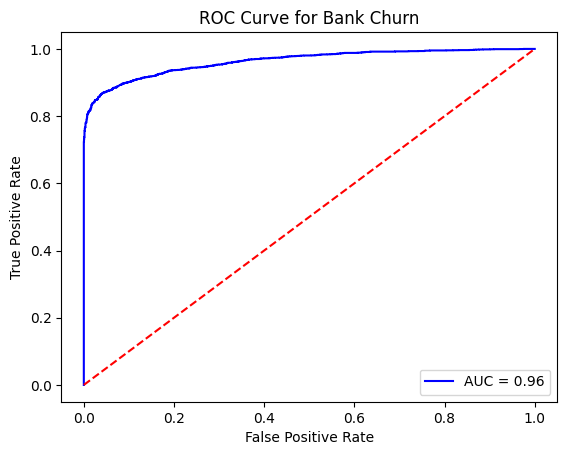

In [1034]:
plt.title('ROC Curve for Bank Churn')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('Bank Churn.jpg')
plt.show()

In [1021]:
#X_train = np.asarray(X_train).astype('float32')
#X_test = np.asarray(X_test).astype('float32')

In [1022]:
'''

inputs = keras.Input(shape=(X_train.shape[1],), name="Churn Features")
layer_1 = layers.Dense(14, activation="relu", name="dense_layer_1")(inputs)
layer_2 = layers.Dense(14, activation="relu", name="dense_layer_2")(layer_1)
outputs = layers.Dense(2, activation="sigmoid", name="output_layer")(layer_2)

'''

'\n\ninputs = keras.Input(shape=(X_train.shape[1],), name="Churn Features")\nlayer_1 = layers.Dense(14, activation="relu", name="dense_layer_1")(inputs)\nlayer_2 = layers.Dense(14, activation="relu", name="dense_layer_2")(layer_1)\noutputs = layers.Dense(2, activation="sigmoid", name="output_layer")(layer_2)\n\n'

In [1023]:
#model = keras.Model(inputs=inputs, outputs=outputs, name="Bank_Churn_Model_2")

In [1024]:
'''
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss= keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.mae, keras.metrics.sparse_categorical_accuracy])
'''

'\nmodel.compile(optimizer=keras.optimizers.RMSprop(),\n              loss= keras.losses.SparseCategoricalCrossentropy(),\n              metrics=[keras.metrics.mae, keras.metrics.sparse_categorical_accuracy])\n'

In [1025]:
#model.summary()

In [1026]:
'''
print("Fitting the model on the training data")
history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=50
)
'''

'\nprint("Fitting the model on the training data")\nhistory = model.fit(\n    X_train,\n    y_train,\n    batch_size=32,\n    epochs=50\n)\n'

In [1027]:
#y_pred = model.predict(X_test)
#y_pred = (y_pred > 0.5)

In [1028]:
'''

test_scores = model.evaluate(X_test, y_test, verbose=2)
print("Test Loss:", test_scores[0])
print("Test accuracy:", test_scores[1])
dict(zip(model.metrics_names, test_scores))

'''

'\n\ntest_scores = model.evaluate(X_test, y_test, verbose=2)\nprint("Test Loss:", test_scores[0])\nprint("Test accuracy:", test_scores[1])\ndict(zip(model.metrics_names, test_scores))\n\n'

In [1029]:
#print(cm)

In [1030]:
#print(acc)

In [1031]:
"""
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
"""

'\nimport sklearn.metrics as metrics\n# calculate the fpr and tpr for all thresholds of the classification\nprobs = classifier.predict_proba(X_test)\npreds = probs[:,1]\nfpr, tpr, threshold = metrics.roc_curve(y_test, preds)\nroc_auc = metrics.auc(fpr, tpr)\n'

In [1032]:
"""
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
"""

"\nplt.title('Receiver Operating Characteristic')\nplt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)\nplt.legend(loc = 'lower right')\nplt.plot([0, 1], [0, 1],'r--')\n#plt.xlim([0, 1])\n#plt.ylim([0, 1])\nplt.ylabel('True Positive Rate')\nplt.xlabel('False Positive Rate')\nplt.show()\n"